In [1]:
import tensorflow as tf
from vit_tensorflow.vit import ViT

import matplotlib.pyplot as plt

import numpy as np

2023-03-12 14:48:34.870597: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 14:48:35.506572: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-12 14:48:35.506641: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-12 14:48:35.506648: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
# Normalise pixel values
# train_images, test_images = train_images / 255.0, test_images / 255.0

print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [3]:


#input_layer = tf.keras.layers.Input(shape=(32, 32, 3))
model = ViT(
    image_size=32,
    patch_size=4, # number_of_patches = (image_size // patch_size) ** 2 = (32 // 4)²  = 64
    num_classes=10,
    dim=1024, # Arbitrary number
    depth=6, # Arbitrary
    heads=16, # Arbitrary
    mlp_dim=2048, # Arbitrary
    dropout=0.1,
    emb_dropout=0.1,
)

2023-03-12 14:48:52.017927: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 14:48:52.024750: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 14:48:52.025021: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 14:48:52.025773: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [14]:
model.compile(optimizer="Adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=20, validation_data=(test_images, test_labels))

Epoch 1/10
(20, 32, 32, 3)
(20, 32, 32, 3)
20 64 1024
(20, 32, 32, 3)
(20, 32, 32, 3)
20 64 1024
2500/2500 [==============================] - ETA: 0s - loss: 2.0111 - accuracy: 0.2382(20, 32, 32, 3)
(20, 32, 32, 3)
20 64 1024
2500/2500 [==============================] - 466s 183ms/step - loss: 2.0111 - accuracy: 0.2382 - val_loss: 1.9840 - val_accuracy: 0.2408
Epoch 2/10
2500/2500 [==============================] - 450s 180ms/step - loss: 1.9862 - accuracy: 0.2501 - val_loss: 2.0348 - val_accuracy: 0.2332
Epoch 3/10
2500/2500 [==============================] - 454s 182ms/step - loss: 1.9871 - accuracy: 0.2435 - val_loss: 1.9976 - val_accuracy: 0.2386
Epoch 4/10
2500/2500 [==============================] - 453s 181ms/step - loss: 1.9756 - accuracy: 0.2527 - val_loss: 1.9435 - val_accuracy: 0.2710
Epoch 5/10
2500/2500 [==============================] - 448s 179ms/step - loss: 1.9503 - accuracy: 0.2650 - val_loss: 1.9480 - val_accuracy: 0.2687
Epoch 6/10
2500/2500 [=======================

500/500 - 24s - loss: 1.9103 - accuracy: 0.2774 - 24s/epoch - 48ms/step


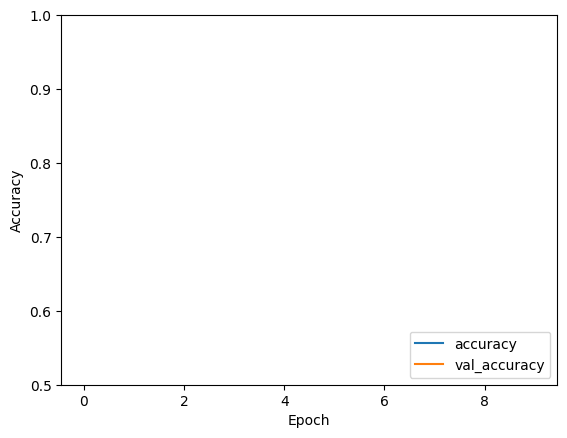

In [16]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2, batch_size=20)

In [18]:
predictions = model.predict(test_images, batch_size=20)
tf.nn.softmax(predictions)

(20, 32, 32, 3)
(20, 32, 32, 3)
20 64 1024
500/500 [==============================] - 29s 56ms/step


<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[0.31012592, 0.09989037, 0.07803843, ..., 0.03428641, 0.26156363,
        0.07108694],
       [0.05337725, 0.24217941, 0.04107991, ..., 0.07854445, 0.07083268,
        0.24668789],
       [0.2808942 , 0.07564969, 0.06124566, ..., 0.03946319, 0.2863623 ,
        0.11270666],
       ...,
       [0.01836964, 0.0465196 , 0.08552448, ..., 0.2336718 , 0.00895126,
        0.04435313],
       [0.08507963, 0.12909904, 0.06890108, ..., 0.12946443, 0.08317833,
        0.2148105 ],
       [0.07574673, 0.04420032, 0.12127873, ..., 0.20399122, 0.04165925,
        0.07100319]], dtype=float32)>

In [19]:
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i][0], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]),
        color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i][0]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

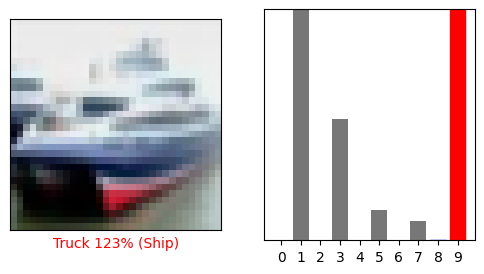

In [20]:
i = 1
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

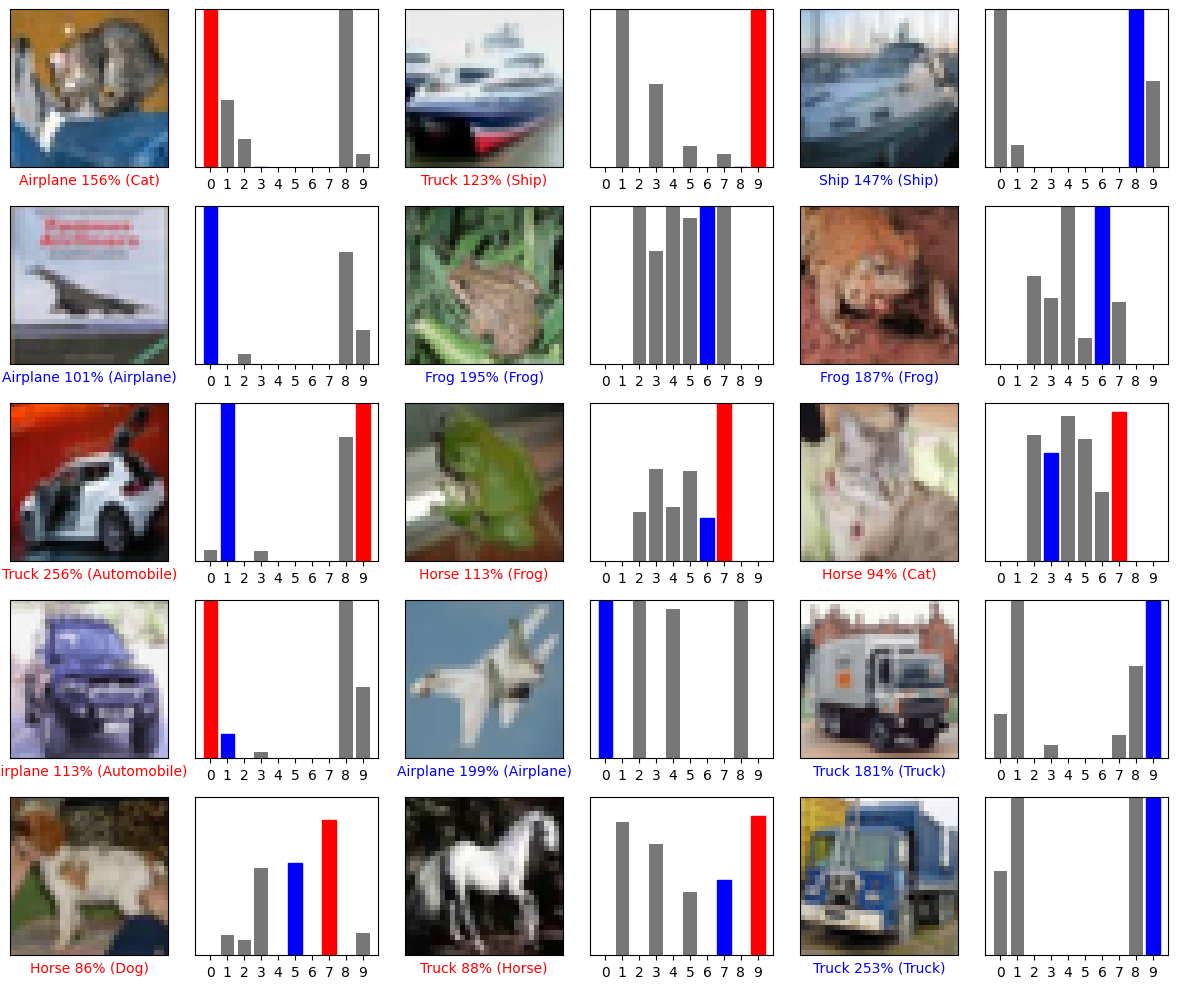

In [21]:
plt.show()
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()



# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the training dataset.
batch_size = 8
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Reserve 10,000 samples for validation.
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# Prepare the training dataset.
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(batch_size)

epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:

            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))

In [3]:
v = ViT(
    image_size=256,
    patch_size=32,
    num_classes=1000,
    dim=1024,
    depth=6,
    heads=16,
    mlp_dim=2048,
    dropout=0.1,
    emb_dropout=0.1
)

img = tf.random.normal(shape=[50000, 256, 256, 3])
preds = v(img)  # (1, 1000)
v.summary()

2023-03-12 14:14:08.341274: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 14:14:08.348386: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 14:14:08.348625: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-12 14:14:08.349170: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

(50, 256, 256, 3)
(50, 256, 256, 3)
50 64 1024


2023-03-12 14:14:10.311755: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


Model: "vi_t"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 patch_embedding (Sequential  (50, 64, 1024)           3146752   
 )                                                               
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 transformer (Transformer)   multiple                  50380800  
                                                                 
 mlp_head (Sequential)       (50, 1000)                1027048   
                                                                 
Total params: 54,622,184
Trainable params: 54,622,184
Non-trainable params: 0
_________________________________________________________________
